# Определение

Многомерный (мультивариативный, multivariate time series) временной ряд - это система из нескольких одномерных рядов, где значения одного (целевого) зависят не только от предыдущих значений этого ряда, но и от значений дополнительного, или нескольких дополнительных.

Дополнительные времянные ряды называются экзогенными.

Существует две возможные задачи при прогнозировании мультивариативного временного ряда.
1. 
На момент формирования прогноза будут доступны данные экзогенных временных рядов только на текущий момент времени и предыстория, то есть t, t-1, t-2, t-n, в то время как данные на индексы прогноза t+1, t+2, t+f (где f - горизонт прогнозирования), неизвестны.
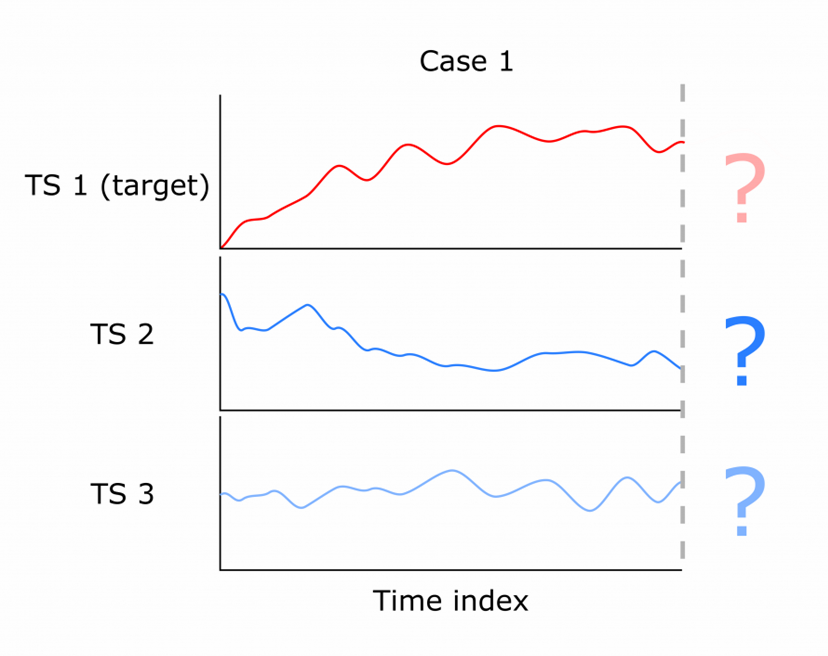

2.
Для целевого временного ряда значения на прогнозные индексы неизвестны, но зато есть информация об экзогенных в эти моменты времени.

Это задача регрессии, однако, поскольку данные упорядочены во времени, есть возможность решать “динамическую регрессию”, которая учитывает ещё и лаговые взаимосвязи в данных.
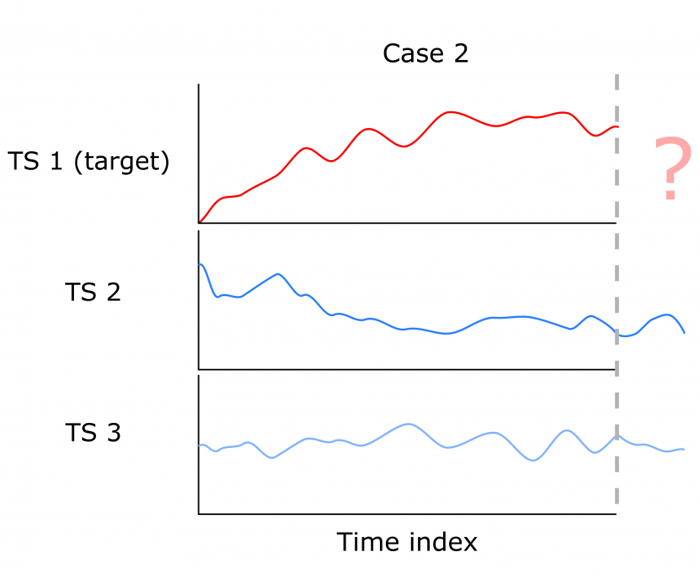



# Vector Auto Regression (VAR)

Векторная авторегрессия - один из наиболее используемых в настоящее время алгоритмов для предсказания мультивариативных временных рядов.

В алгоритме VAR каждая переменная является линейной функцией прошлых значений самой себя и прошлых значений всех других переменных. 

Допустим у нас есть две переменные: y1 и y2. Нам нужно спрогнозировать значение этих двух переменных в момент времени «t» на основе данных для прошлых n значений. Для простоты примем лаг равным 1.

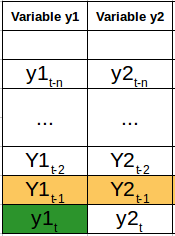 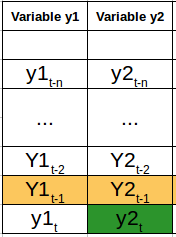

Чтобы вычислить y1(t), мы будем использовать прошлые значения y1 и y2. Аналогично, для вычисления y2(t) будут использоваться прошлые значения как y1, так и y2.

Простой математический способ представления этого отношения (Пусть это будет система уравнений 1):

 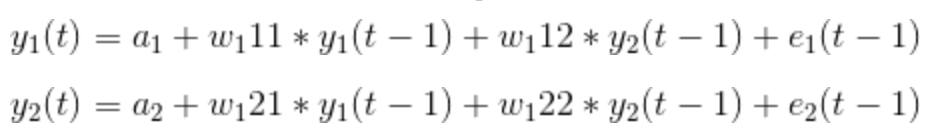

где
a1 и a2 — постоянные члены,
w11, w12, w21 и w22 — коэффициенты,
e1 и e2 — члены ошибки
Эти уравнения аналогичны уравнению процесса АР. Поскольку процесс AR используется для одномерных данных временных рядов, будущие значения представляют собой линейные комбинации только своих прошлых значений. Рассмотрим процесс AR(1):
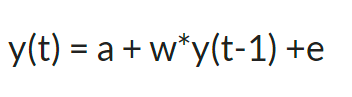

В этом случае у нас есть только одна переменная – y, постоянный член – a,  ошибка – e и коэффициент – w. Чтобы учесть несколько переменных членов в каждом уравнении для VAR, мы будем использовать векторы. Уравнения (1)  можно записать в следующем векторном виде:

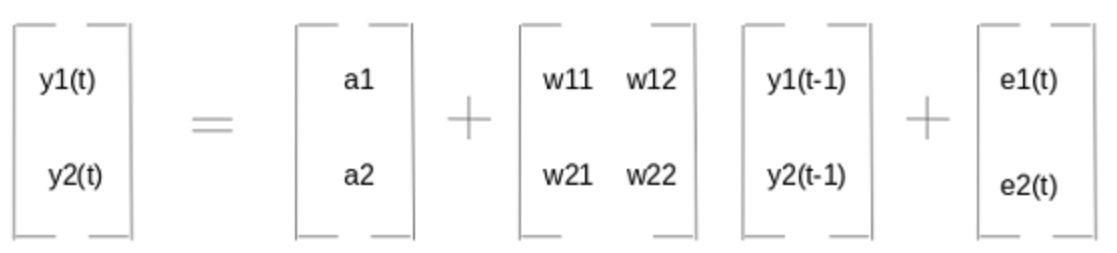


Двумя переменными являются y1 и y2, за которыми следуют вектор констант, тензор коэффициентов, вектор значений с задержкой и вектор  ошибок. Это векторное уравнение для процесса VAR(1). Для процесса VAR(2) к уравнению будет добавлен еще один векторный член для времени (t-2) для обобщения задержек p:
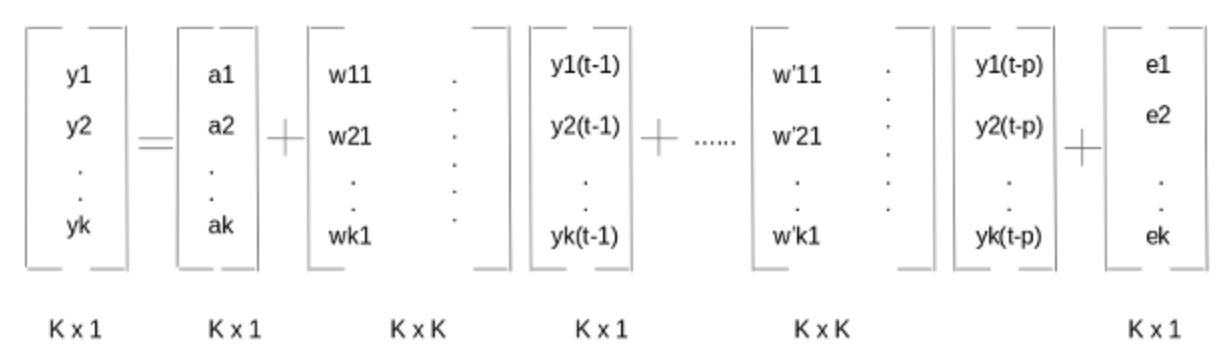

Ну или в другом виде это запишется в виде:
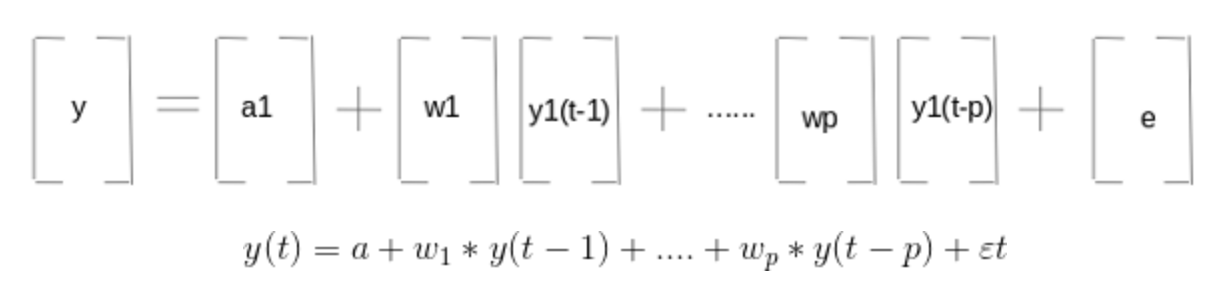

При этом должно выполняться:
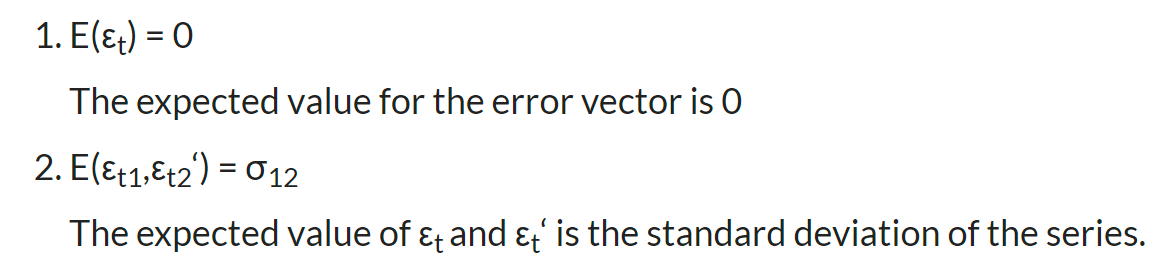

Granger causality test

Тест Грэнджера на причинность (англ. Granger causality test) — процедура проверки причинной (не причинно-следственной (!) связи («причинность по Грэнджеру»)

Тест можно использовать для выявления взаимосвязи между переменными до построения модели. Это важно, поскольку если между переменными нет связи, их можно исключить и смоделировать отдельно. И наоборот, если существует взаимосвязь, переменные необходимо учитывать на этапе моделирования.

Тест дает p-значение для переменных. Если значение p превышает 0,05, необходимо принять нулевую гипотезу. И наоборот, если значение p меньше 0,05, нулевую гипотезу следует отклонить.

В тесте Грэнджера последовательно проверяются две нулевые гипотезы: «x не является причиной y по Грэнджеру» и «у не является причиной x по Грэнджеру». Для проверки этих гипотез строятся две регрессии: в каждой регрессии зависимой переменной является одна из проверяемых на причинность переменных, а регрессорами выступают лаги обеих переменных (фактически это векторная авторегрессия).

${\displaystyle y_{t}=a_{0}+a_{1}y_{t-1}+...+a_{p}y_{t-p}+b_{1}x_{t-1}+...+b_{p}x_{t-p}+\varepsilon _{t}}$
 
${\displaystyle x_{t}=c_{0}+c_{1}x_{t-1}+...+c_{p}x_{t-p}+d_{1}y_{t-1}+...+d_{p}y_{t-p}+u_{t}}$

Для каждой регрессии нулевая гипотеза заключается в том, что коэффициенты при лагах второй переменной одновременно равны нулю.

${\displaystyle H_{0}^{1}:~b_{1}=...=b_{p}=0}$

${\displaystyle H_{0}^{2}:~d_{1}=...=d_{p}=0}$

Данные гипотезы можно проверить, например, с помощью F-теста или LM-теста. Необходимо отметить, что результаты теста могут зависеть от количества использованных лагов в регрессиях.

# Stationarity of a Multivariate Time Series

Стационарные ряды предсказываются лучше, чем нестационнарные. Подобно расширенному тесту Дики-Фуллера для одномерных рядов, у нас есть тест Йохансена для проверки стационарности любых данных многомерных временных рядов.

# Train-Validation Split

На трейн, тест и валидационные наборы необходимо делить с учетом временных интервалов, не перемешивая значения.

Рассмотрим мультивариативный ряд

Данные взяты с химического мультисенсорного устройства качества воздуха. 
Устройство было расположено на поле в значительно загрязненной зоне, на уровне дороги в итальянском городе. Данные были записаны с марта 2004 г. по февраль 2005 г. (один год) и представляют собой самые длительные свободно доступные записи реакций химических датчиков качества воздуха, развернутых на местах. Усредненные почасовые концентрации Ground Truth для CO, неметановых углеводородов, бензола, общих оксидов азота (NOx) и диоксида азота (NO2) были получены с помощью расположенного рядом эталонного сертифицированного анализатора. Свидетельства перекрестной чувствительности, а также дрейфа как концепций, так и датчиков присутствуют, как описано в De Vito et al., Sens. And Act. Б, Том. 129,2,2008 (требуется ссылка), что в конечном итоге влияет на возможности оценки концентрации датчиков. Отсутствующие значения помечены значением -200.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [51]:
df = pd.read_csv("data/AirQualityUCI.csv", parse_dates=[['Date', 'Time']], sep = ";",decimal =",")

df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

C:\Users\Mi\AppData\Local\Temp\ipykernel_19872\2551521102.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("data/AirQualityUCI.csv", parse_dates=[['Date', 'Time']], sep = ";",decimal =",")


In [52]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [53]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [54]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [55]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [69]:
df = data.copy()

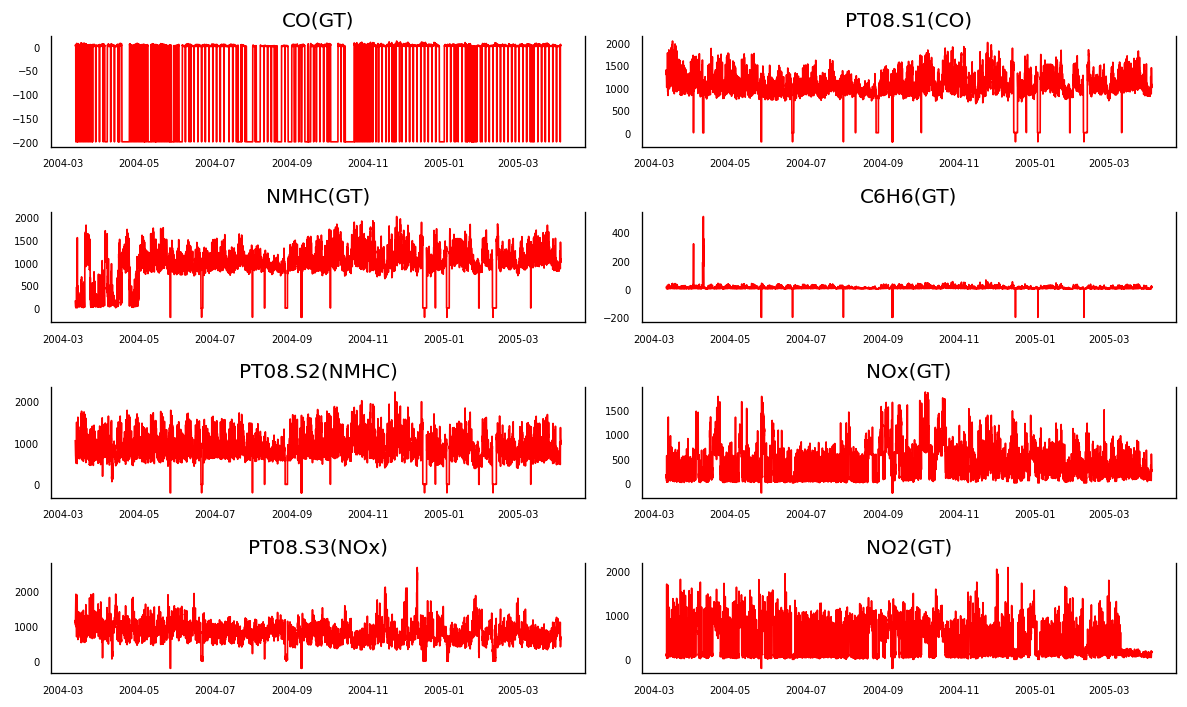

In [70]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Работа с отсутствующими значениями
Следующий шаг — разобраться с пропущенными значениями. Не всегда целесообразно использовать df.dropna. Поскольку пропущенные значения в данных заменяются значением -200, нам придется заменить недостающее значение лучшим числом. 

Если текущее значение точки росы отсутствует, мы можем с уверенностью предположить, что оно будет близко к значению предыдущего часа. Будем вместо -200  запиывать предыдущее значение.

Можно использовать другие вариант борьбы с пропусками.

In [71]:
# заменяем отсутствующие значения

cols = df.columns
 
for j in range(1,len(cols)):
    for i in range(0,len(df.iloc[:,j])):
       if df.iloc[i,j] == -200.0:
           df.iloc[i,j] = df.iloc[i,j-1]

           

In [73]:
# Проверяем стационарность

from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = df.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

array([0.17408382, 0.16362687, 0.09546836, 0.06650654, 0.06143461,
       0.05048135, 0.03757558, 0.03121995, 0.0270527 , 0.00606444,
       0.0041724 , 0.00065524])

In [74]:
# granger causality tests

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [75]:
grangers_causation_matrix(df, variables = df.columns) 

p:\perm__ml_ai\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
p:\perm__ml_ai\.venv\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
p:\perm__ml_ai\.venv\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '
p:\perm__ml_ai\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
p:\perm__ml_ai\.venv\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
p

,CO(GT)_x,PT08.S1(CO)_x,NMHC(GT)_x,C6H6(GT)_x,PT08.S2(NMHC)_x,NOx(GT)_x,PT08.S3(NOx)_x,NO2(GT)_x,PT08.S4(NO2)_x,PT08.S5(O3)_x,T_x,RH_x,AH_x
CO(GT)_y,1.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0003,0.0002
PT08.S1(CO)_y,0.0000,1.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
NMHC(GT)_y,0.0000,0.0,1.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
C6H6(GT)_y,0.0000,0.0,0.0,1.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
PT08.S2(NMHC)_y,0.0000,0.0,0.0,0.0000,1.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
NOx(GT)_y,0.0000,0.0,0.0,0.0000,0.0,1.0000,0.0,0.0000,0.0,0.0000,0.0020,0.0002,0.0308
PT08.S3(NOx)_y,0.0000,0.0,0.0,0.0000,0.0,0.0000,1.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
NO2(GT)_y,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,1.0000,0.0,0.0000,0.2612,0.0000,0.1174
PT08.S4(NO2)_y,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0000,1.0,0.0000,0.0012,0.0000,0.0000
PT08.S5(O3)_y,0.0000,0.0,0.0,0.0001,0.0,0.0000,0.0,0.0000,0.0,1.0000,0.0000,0.0000,0.0000


# Коинтегральность

Когда два или более временных ряда коинтегрированы, это означает, что они имеют долгосрочную, статистически значимую связь.

Это основная предпосылка, на которой основаны модели векторной авторегрессии (VAR).
Итак, довольно часто перед началом построения VAR-моделей проводят тест на коинтеграцию.

более технически:
Порядок интегрирования (d) — это не что иное, как количество разностей, необходимое для того, 
чтобы сделать нестационарный временной ряд стационарным.

Теперь, когда у вас есть два или более временных ряда и существует их линейная комбинация, 
у которой порядок интегрирования (d) меньше, чем у отдельного ряда, тогда совокупность рядов называется коинтегрированной.

In [76]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)



In [77]:
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CO(GT) ::  4945.27   > nan       =>   False
PT08.S1(CO) ::  3131.83   > 311.1288  =>   True
NMHC(GT) ::  2367.06   > 263.2603  =>   True
C6H6(GT) ::  1734.6    > 219.4051  =>   True
PT08.S2(NMHC) ::  1360.3    > 179.5199  =>   True
NOx(GT) ::  1055.66   > 143.6691  =>   True
PT08.S3(NOx) ::  779.0     > 111.7797  =>   True
NO2(GT) ::  549.68    > 83.9383   =>   True
PT08.S4(NO2) ::  340.79    > 60.0627   =>   True
PT08.S5(O3) ::  169.64    > 40.1749   =>   True
T      ::  62.54     > 24.2761   =>   True
RH     ::  24.77     > 12.3212   =>   True
AH     ::  4.37      > 4.1296    =>   True


C:\Users\Mi\AppData\Local\Temp\ipykernel_19872\3054894920.py:5: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  out = coint_johansen(df,-1,5)


In [78]:
# Стационарность
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [79]:
# Разделяем выборку на трейн и тест
#creating the train and validation set
train = df[:int(0.8*(len(data)))]
test = df[int(0.8*(len(data))):]



In [82]:
for name, column in train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO(GT)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6091
 No. Lags Chosen       = 26
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PT08.S1(CO)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.055
 No. Lags Chosen       = 29
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NMHC(GT)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance L

In [84]:
# если нестационарный, то удаляем тренд (помните дифференцирование ?) и опять проверяеми
# 1st difference
df_differenced = train.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')



    Augmented Dickey-Fuller Test on "CO(GT)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.5248
 No. Lags Chosen       = 33
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PT08.S1(CO)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.4567
 No. Lags Chosen       = 36
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NMHC(GT)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [86]:
# если опять нестационарные - опять дифференцируем


df_differenced = df_differenced.diff().dropna()

# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO(GT)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -33.6875
 No. Lags Chosen       = 36
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PT08.S1(CO)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -37.5814
 No. Lags Chosen       = 36
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NMHC(GT)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [87]:
# Чтобы выбрать правильный порядок модели VAR, мы итеративно подбираем возрастающие порядки модели VAR и выбираем порядок, который дает модель с наименьшим AIC.

from statsmodels.tsa.vector_ar.var_model import VAR


model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')




p:\perm__ml_ai\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  106.81104108654715
BIC :  106.97939587318541
FPE :  2.4403143564622857e+46
HQIC:  106.86886018731917 

Lag Order = 2
AIC :  102.82336891667784
BIC :  103.14809028204013
FPE :  4.525034640796181e+44
HQIC:  102.93489068348231 

Lag Order = 3
AIC :  100.23552902928478
BIC :  100.71665274549545
FPE :  3.4020267481991543e+43
HQIC:  100.40076646815227 

Lag Order = 4
AIC :  98.40605543729606
BIC :  99.0436172896182
FPE :  5.460195620925181e+42
HQIC:  98.6250215591726 

Lag Order = 5
AIC :  97.12356302618802
BIC :  97.91759881303005
FPE :  1.514363292245253e+42
HQIC:  97.39627084693757 

Lag Order = 6
AIC :  96.0473885570254
BIC :  96.99793408994769
FPE :  5.162443280602867e+41
HQIC:  96.37385109743242 

Lag Order = 7
AIC :  95.27477193307918
BIC :  96.38186303680061
FPE :  2.3840465608802095e+41
HQIC:  95.65500221885111 

Lag Order = 8
AIC :  94.58294493127599
BIC :  95.84661744368059
FPE :  1.1936074018740702e+41
HQIC:  95.01695599304578 

Lag Order = 9
AIC :  94.096984

In [89]:
# другой вариает - автозаполнение. Лучшие метрики выделены *

x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,114.9,114.9,7.790e+49,114.9
1,106.8,107.0,2.431e+46,106.9
2,102.8,103.1,4.506e+44,102.9
3,100.2,100.7,3.389e+43,100.4
4,98.40,99.04,5.444e+42,98.62
5,97.12,97.91,1.509e+42,97.39
6,96.04,96.99,5.134e+41,96.37
7,95.27,96.38,2.375e+41,95.65
8,94.58,95.85,1.194e+41,95.02
9,94.10,95.52,7.351e+40,94.59


In [90]:
# заполняем модель с лучшими параметрами
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Dec, 2023
Time:                     00:48:09
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    94.6837
Nobs:                     7470.00    HQIC:                   93.4426
Log likelihood:          -482335.    FPE:                1.99383e+40
AIC:                      92.7934    Det(Omega_mle):     1.52145e+40
--------------------------------------------------------------------
Results for equation CO(GT)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.004115         0.418459           -0.010           0.992
L1.CO(GT)                -2.201522         0.012017         -183.195           0.000
L1.PT08.S1(CO)            0.018160         

# проверяяем оставшуюся последовательную корреляцию

Последовательная корреляция остатков используется для проверки наличия в остатках какого-либо остаточного шаблона (ошибок). Если в остатках осталась какая-либо корреляция, то во временном ряду есть некоторая закономерность, которую еще предстоит объяснить с помощью модели. В этом случае типичный образ действий — либо увеличить порядок модели, либо ввести в систему больше предикторов, либо искать другой алгоритм для моделирования временного ряда.

Распространенный способ проверки серийной корреляции ошибок можно измерить с помощью статистики Дурбина Уотсона.

Значение этой статистики может варьироваться от 0 до 4. Чем ближе она к значению 2, тем значимой последовательной корреляции нет. Чем ближе к 0, существует положительная последовательная корреляция, а чем ближе к 4, подразумевается отрицательная последовательная корреляция.

In [91]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

# for col, val in zip(df.columns, out):
#    print(adjust(col), ':', round(val, 2))
    
for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

CO(GT) : 2.05
PT08.S1(CO) : 2.07
NMHC(GT) : 2.06
C6H6(GT) : 2.08
PT08.S2(NMHC) : 2.07
NOx(GT) : 2.06
PT08.S3(NOx) : 2.06
NO2(GT) : 2.1
PT08.S4(NO2) : 2.07
PT08.S5(O3) : 2.07
T : 2.06
RH : 2.06
AH : 2.06


Для прогнозирования модель VAR ожидает количество наблюдений, равное порядку задержки (лагов), на основе прошлых данных. Это связано с тем, что члены модели VAR по сути являются лагами различных временных рядов в наборе данных, поэтому вам необходимо предоставить столько предыдущих значений, сколько указано в порядке запаздывания, используемом моделью.

In [92]:
# получаем значение лага
lag_order = model_fitted.k_ar
print(lag_order) 

12


In [93]:
# данные для предсказания
forecast_input = df_differenced.values[-lag_order:]
forecast_input

array([[ 1.200e+00,  5.100e+01,  5.100e+01, -1.000e+00, -3.300e+01,
         8.640e+02,  4.200e+01,  7.400e+02, -1.600e+01, -2.100e+01,
        -1.800e+00,  6.500e+00, -1.660e-02],
       [-3.000e-01, -6.100e+01, -6.100e+01,  9.000e-01,  5.000e+01,
        -1.828e+03, -2.400e+01, -2.048e+03,  1.400e+01, -1.300e+01,
         2.100e+00, -1.020e+01,  1.000e-04],
       [-7.000e-01, -5.800e+01, -5.800e+01, -3.100e+00, -1.450e+02,
         1.687e+03,  1.000e+02,  2.029e+03, -1.120e+02, -4.600e+01,
         3.000e-01, -1.000e+00,  3.000e-04],
       [ 4.000e-01,  1.450e+02,  1.450e+02,  3.600e+00,  1.820e+02,
        -5.840e+02, -1.960e+02, -7.030e+02,  1.530e+02,  1.220e+02,
        -1.700e+00,  1.140e+01,  2.800e-02],
       [ 3.000e-01, -5.800e+01, -5.800e+01, -1.400e+00, -7.200e+01,
         1.320e+02,  5.500e+01,  4.500e+01, -7.100e+01, -6.000e+00,
        -4.000e-01, -6.000e-01, -1.410e-02],
       [-6.000e-01, -1.700e+02, -1.700e+02, -2.100e+00, -1.080e+02,
        -1.530e+02,  2.000e

In [95]:
# Forecast
nobs = 20 # количество точек для предсказания
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs defined at top of program
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,CO(GT)_2d,PT08.S1(CO)_2d,NMHC(GT)_2d,C6H6(GT)_2d,PT08.S2(NMHC)_2d,NOx(GT)_2d,PT08.S3(NOx)_2d,NO2(GT)_2d,PT08.S4(NO2)_2d,PT08.S5(O3)_2d,T_2d,RH_2d,AH_2d
Date_Time,,,,,,,,,,,,,
2005-04-03 19:00:00,-2.231581,134.109828,131.101387,4.069764,181.000743,17.399935,-179.779166,-68.859061,118.947131,165.852568,3.876786,-5.240218,1.373808
2005-04-03 20:00:00,16.165787,-22.844607,-24.643719,-3.135565,-25.026251,150.659755,21.875330,236.121502,-2.767162,-5.574199,-4.713856,-1.414959,-3.814251
2005-04-03 21:00:00,-28.197771,-77.009603,-70.422583,0.309063,-62.055334,-162.548701,5.193207,-145.810584,-82.534786,-61.575491,3.831528,4.882307,4.895161
2005-04-03 22:00:00,18.255591,69.406145,69.877280,1.435281,40.311880,104.311994,14.169996,31.706453,72.514397,30.549155,-2.956349,-1.780636,-3.761998
2005-04-03 23:00:00,-11.093519,-50.385233,-51.161195,-1.246539,-41.786858,-212.395083,16.756830,-225.950505,-63.834551,-33.257332,1.697260,1.376998,2.195712
2005-04-04 00:00:00,27.226678,9.421095,16.284058,-1.584115,2.262442,213.487368,-15.238843,338.248785,13.018118,3.433988,-1.634823,-3.087290,-2.275167
2005-04-04 01:00:00,-37.168532,38.517423,23.890072,2.995444,43.042429,-43.802840,5.070716,-135.849118,32.107034,40.919096,2.911465,2.570957,2.645100
2005-04-04 02:00:00,22.212644,0.856621,3.443932,0.142801,8.786249,-1.003312,-29.197155,-11.650244,21.803604,-2.375820,-2.096259,0.515754,-1.401986
2005-04-04 03:00:00,-3.147911,20.903436,19.669602,-0.331181,27.846552,26.927270,-4.936836,-11.333400,21.079321,65.045671,0.556954,-1.802332,0.209832


Вспоминаем, что для предсказания мы модифицировали датасет. (мы его дифференцировали). Теперь надо обратно вернуть.

In [96]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [105]:
cl = ['CO(GT)_2d', 'PT08.S1(CO)_2d', 'NMHC(GT)_2d', 'C6H6(GT)_2d', 'PT08.S2(NMHC)_2d',
      'NOx(GT)_2d', 'PT08.S3(NOx)_2d', 'NO2(GT)_2d', 'PT08.S4(NO2)_2d', 'PT08.S5(O3)_2d', 'T_2d', 'RH_2d', 'AH_2d'] 
df_results = invert_transformation(train, df_forecast, second_diff=True)        
df_results.loc[:, cl]

,CO(GT)_2d,PT08.S1(CO)_2d,NMHC(GT)_2d,C6H6(GT)_2d,PT08.S2(NMHC)_2d,NOx(GT)_2d,PT08.S3(NOx)_2d,NO2(GT)_2d,PT08.S4(NO2)_2d,PT08.S5(O3)_2d,T_2d,RH_2d,AH_2d
Date_Time,,,,,,,,,,,,,
2005-04-03 19:00:00,-2.231581,134.109828,131.101387,4.069764,181.000743,17.399935,-179.779166,-68.859061,118.947131,165.852568,3.876786,-5.240218,1.373808
2005-04-03 20:00:00,16.165787,-22.844607,-24.643719,-3.135565,-25.026251,150.659755,21.875330,236.121502,-2.767162,-5.574199,-4.713856,-1.414959,-3.814251
2005-04-03 21:00:00,-28.197771,-77.009603,-70.422583,0.309063,-62.055334,-162.548701,5.193207,-145.810584,-82.534786,-61.575491,3.831528,4.882307,4.895161
2005-04-03 22:00:00,18.255591,69.406145,69.877280,1.435281,40.311880,104.311994,14.169996,31.706453,72.514397,30.549155,-2.956349,-1.780636,-3.761998
2005-04-03 23:00:00,-11.093519,-50.385233,-51.161195,-1.246539,-41.786858,-212.395083,16.756830,-225.950505,-63.834551,-33.257332,1.697260,1.376998,2.195712
2005-04-04 00:00:00,27.226678,9.421095,16.284058,-1.584115,2.262442,213.487368,-15.238843,338.248785,13.018118,3.433988,-1.634823,-3.087290,-2.275167
2005-04-04 01:00:00,-37.168532,38.517423,23.890072,2.995444,43.042429,-43.802840,5.070716,-135.849118,32.107034,40.919096,2.911465,2.570957,2.645100
2005-04-04 02:00:00,22.212644,0.856621,3.443932,0.142801,8.786249,-1.003312,-29.197155,-11.650244,21.803604,-2.375820,-2.096259,0.515754,-1.401986
2005-04-04 03:00:00,-3.147911,20.903436,19.669602,-0.331181,27.846552,26.927270,-4.936836,-11.333400,21.079321,65.045671,0.556954,-1.802332,0.209832


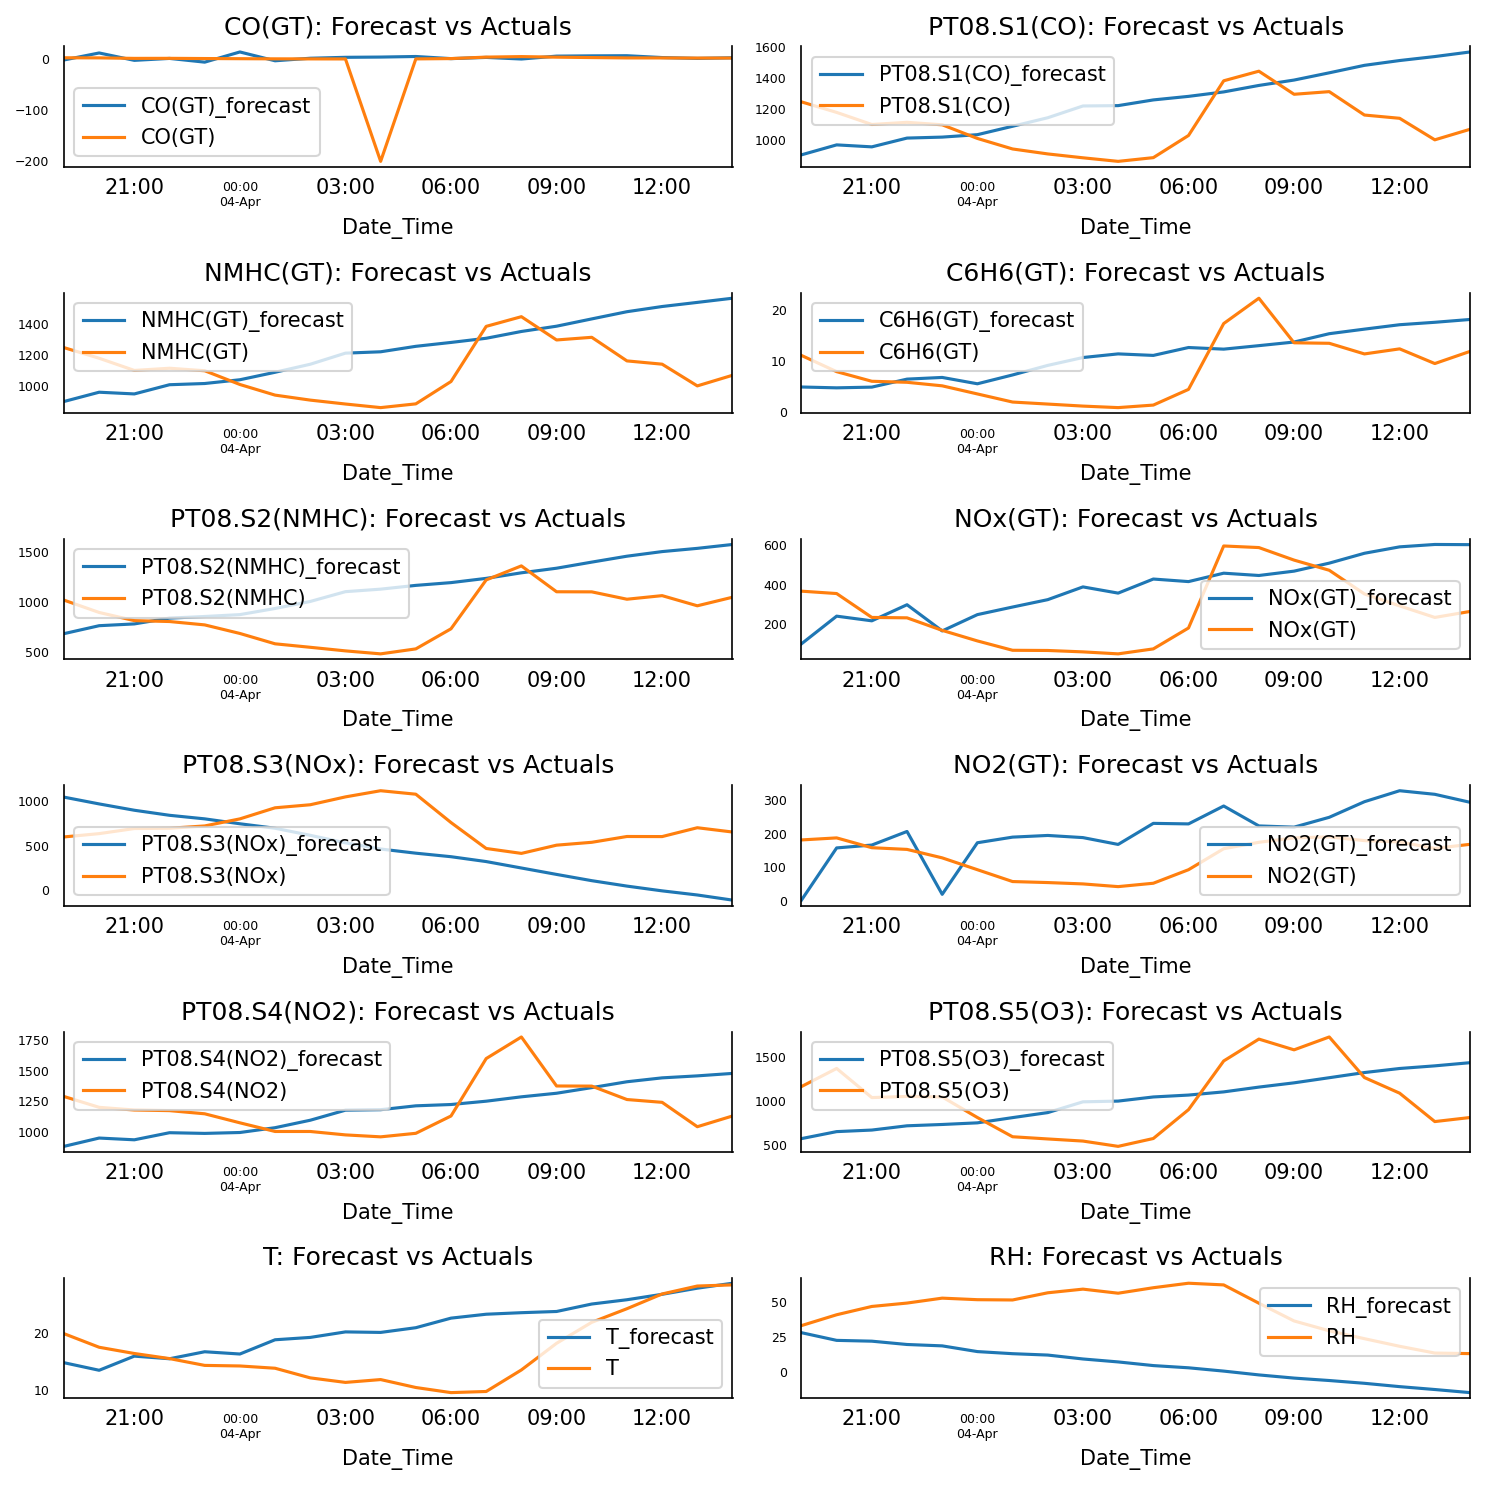

In [107]:
# отрисовываем


fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [109]:
# Метрики!

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [124]:
cols = test.columns.to_list()

for vi in range(len(cols)):
    print(f'Forecast Accuracy of: {cols[vi]}')
    n1 = f"{cols[vi]}_forecast"
    accuracy_prod = forecast_accuracy(df_results[n1].values, np.array(test.iloc[len(test) - 20: len(test),vi]))
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))



Forecast Accuracy of: CO(GT)
mape :  3.0674
me :  11.0867
mae :  13.6124
mpe :  1.1702
rmse :  45.8829
corr :  -0.0499
minmax :  3.7061
Forecast Accuracy of: PT08.S1(CO)
mape :  0.2261
me :  131.3192
mae :  235.391
mpe :  0.14
rmse :  277.0797
corr :  0.1523
minmax :  0.1781
Forecast Accuracy of: NMHC(GT)
mape :  0.2253
me :  127.7077
mae :  234.7906
mpe :  0.1367
rmse :  275.1598
corr :  0.1515
minmax :  0.1783
Forecast Accuracy of: C6H6(GT)
mape :  2.2266
me :  2.835
mae :  5.335
mpe :  2.0399
rmse :  6.2575
corr :  0.4445
minmax :  0.4515
Forecast Accuracy of: PT08.S2(NMHC)
mape :  0.464
me :  271.5509
mae :  328.8232
mpe :  0.4068
rmse :  391.2105
corr :  0.4313
minmax :  0.2761
Forecast Accuracy of: NOx(GT)
mape :  1.5693
me :  119.729
mae :  192.7662
mpe :  1.3988
rmse :  225.1615
corr :  0.2776
minmax :  0.4592
Forecast Accuracy of: PT08.S3(NOx)
mape :  0.5525
me :  -268.4292
mae :  389.0784
mpe :  -0.3646
rmse :  446.2221
corr :  0.2532
minmax :  0.522
Forecast Accuracy of: NO2